# Import Libraries


In [86]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

# Load Dataset

In [87]:

df = sns.load_dataset('titanic')



# Clean Dataset

In [88]:
df.drop(columns=['alive'], inplace=True)
df.drop(columns=['who'], inplace=True)

In [89]:

df.drop(columns=['adult_male'], inplace=True)

In [90]:
df.drop(columns=['alone'], inplace=True)


In [91]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town
0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton
1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg
2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton
3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton
4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton


In [92]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   deck         203 non-null    category
 10  embark_town  889 non-null    object  
dtypes: category(2), float64(2), int64(4), object(3)
memory usage: 65.0+ KB
None


In [93]:
print(df.isnull().sum())

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
deck           688
embark_town      2
dtype: int64


In [94]:
df['age'].median()

28.0

In [95]:
df['age'].fillna(df['age'].median(), inplace=True)

In [96]:
df['embarked'].mode()[0]

'S'

In [97]:
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)


In [98]:
df['embark_town'].fillna(df['embark_town'].mode()[0], inplace=True)


In [99]:
df.drop(columns=['deck'], inplace=True)


In [100]:
print(df.isnull().sum())


survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
embark_town    0
dtype: int64


# Scaling and Standardization

In [101]:
from sklearn.preprocessing import StandardScaler
num_cols = ['age', 'fare', 'parch', 'sibsp']

In [102]:
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# Detecting Outliers

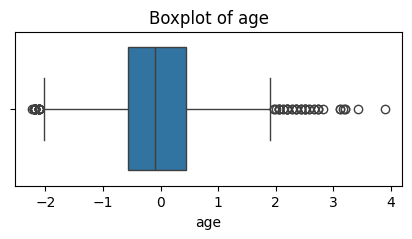

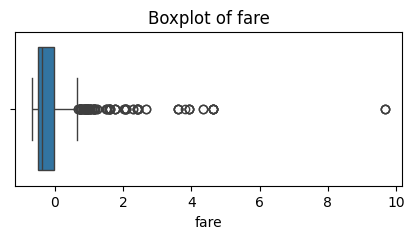

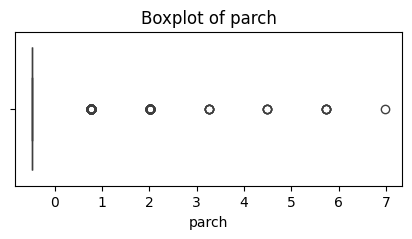

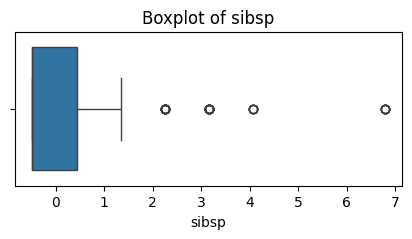

In [103]:
for col in num_cols:
    plt.figure(figsize=(5, 2))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


In [104]:
print(df[num_cols].head())

        age      fare     parch     sibsp
0 -0.565736 -0.502445 -0.473674  0.432793
1  0.663861  0.786845 -0.473674  0.432793
2 -0.258337 -0.488854 -0.473674 -0.474545
3  0.433312  0.420730 -0.473674  0.432793
4  0.433312 -0.486337 -0.473674 -0.474545


# Removing the OUtliers

In [105]:
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

In [106]:
df_cleaned = df[~((df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [107]:
print(f"Original shape: {df.shape}")
print(f"After removing outliers: {df_cleaned.shape}")

Original shape: (891, 10)
After removing outliers: (577, 10)


# Converting Categorical Features into Numerical by Encoding 


In [108]:
from sklearn.preprocessing import LabelEncoder
enc= LabelEncoder()

In [109]:
df.sex=enc.fit_transform(df.sex)

In [110]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town
0,0,3,1,-0.565736,0.432793,-0.473674,-0.502445,S,Third,Southampton
1,1,1,0,0.663861,0.432793,-0.473674,0.786845,C,First,Cherbourg
2,1,3,0,-0.258337,-0.474545,-0.473674,-0.488854,S,Third,Southampton
3,1,1,0,0.433312,0.432793,-0.473674,0.420730,S,First,Southampton
4,0,3,1,0.433312,-0.474545,-0.473674,-0.486337,S,Third,Southampton


In [112]:
df = pd.concat([df , pd.get_dummies(df['embarked'])],axis=1)

In [113]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,C,Q,S
0,0,3,1,-0.565736,0.432793,-0.473674,-0.502445,S,Third,Southampton,False,False,True
1,1,1,0,0.663861,0.432793,-0.473674,0.786845,C,First,Cherbourg,True,False,False
2,1,3,0,-0.258337,-0.474545,-0.473674,-0.488854,S,Third,Southampton,False,False,True
3,1,1,0,0.433312,0.432793,-0.473674,0.420730,S,First,Southampton,False,False,True
4,0,3,1,0.433312,-0.474545,-0.473674,-0.486337,S,Third,Southampton,False,False,True


In [115]:
df.drop(['embarked','C'],axis=1,inplace=True)

In [116]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,class,embark_town,Q,S
0,0,3,1,-0.565736,0.432793,-0.473674,-0.502445,Third,Southampton,False,True
1,1,1,0,0.663861,0.432793,-0.473674,0.786845,First,Cherbourg,False,False
2,1,3,0,-0.258337,-0.474545,-0.473674,-0.488854,Third,Southampton,False,True
3,1,1,0,0.433312,0.432793,-0.473674,0.420730,First,Southampton,False,True
4,0,3,1,0.433312,-0.474545,-0.473674,-0.486337,Third,Southampton,False,True


<Axes: >

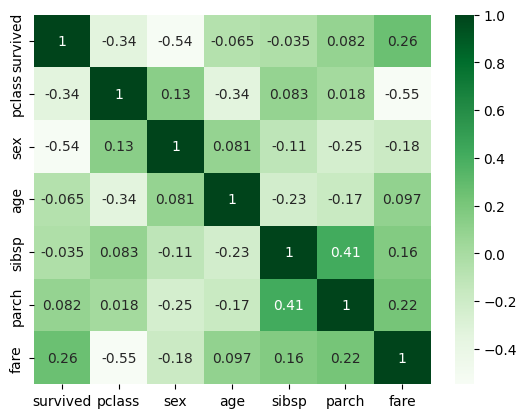

In [118]:

numeric_df = df.select_dtypes(include=['float64', 'int64', 'int32'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='Greens')